# -------------------------  Level 2   ---------------------------

## Task 1 : Table Booking and Online Delivery

◉ Determine the percentage of restaurants thatoffer table booking and online delivery.

◉ Compare the average ratings of restaurantswith table booking and those without.

◉ Analyze the availability of online deliveryamong restaurants with different price ranges.

In [33]:
import warnings
warnings.filterwarnings("ignore")

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set(color_codes=True)
%matplotlib inline 

In [35]:
data = pd.read_csv("Dataset.csv")
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [36]:
data['Cuisines'].fillna('Not Specified', inplace=True)
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

#### Determine the percentage of restaurants thatoffer table booking and online delivery.

In [38]:
data['Has Table booking'].value_counts()

Has Table booking
No     8393
Yes    1158
Name: count, dtype: int64

In [39]:
data['Has Online delivery'].value_counts()

Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64

In [40]:
print('Percentage of Resturent offers Tabel booking : ', round((1158/(8393+1158))*100, 2),'%\n')

print('Percentage of Resturent offers Online delivery : ', round((2451/(7100+2451))*100, 2),'%')


Percentage of Resturent offers Tabel booking :  12.12 %

Percentage of Resturent offers Online delivery :  25.66 %


#### Compare the average ratings of restaurantswith table booking and those without.

In [41]:
data_with_table_booking = data[data['Has Table booking'] == 'Yes']
data_without_table_booking = data[data['Has Table booking'] == 'No']

print("Rows with Table booking :",data_with_table_booking.shape )
print("Rows with Table booking :",data_without_table_booking.shape )



Rows with Table booking : (1158, 21)
Rows with Table booking : (8393, 21)


In [42]:
print("Average Ratings:-\n")
print('With Table Booking : ',round(data_with_table_booking["Aggregate rating"].mean(),2))
print('Without Table Booking : ',round(data_without_table_booking["Aggregate rating"].mean(),2))

Average Ratings:-

With Table Booking :  3.44
Without Table Booking :  2.56


#### Analyze the availability of online deliveryamong restaurants with different price ranges.

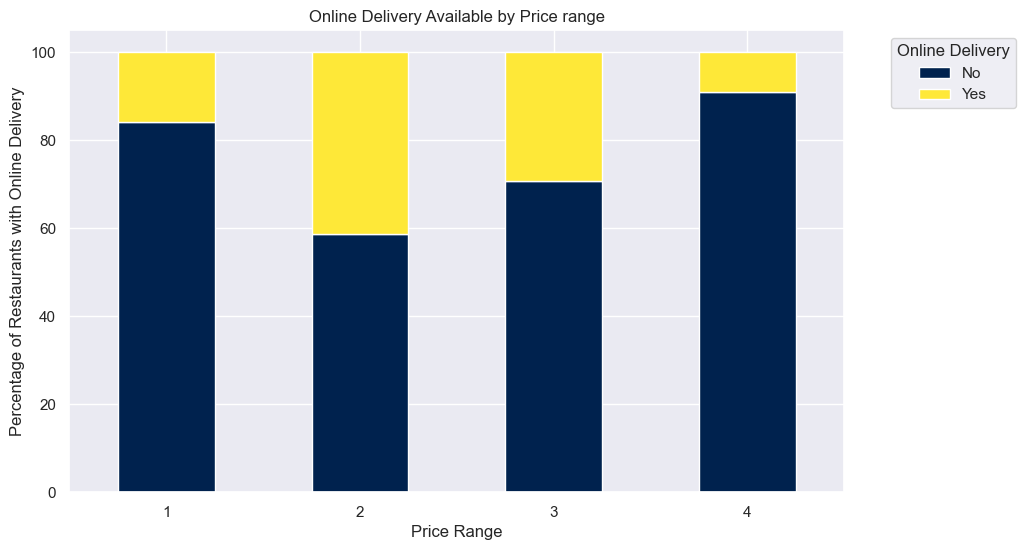

In [43]:
Online_Delivery_by_price_range = data.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack() * 100
Online_Delivery_by_price_range.plot(kind='bar',stacked=True, colormap='cividis', figsize=(10,6)) 
plt.title('Online Delivery Available by Price range')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants with Online Delivery')
plt.xticks(rotation = 0)
plt.legend(title='Online Delivery', bbox_to_anchor = (1.05,1))
plt.show()

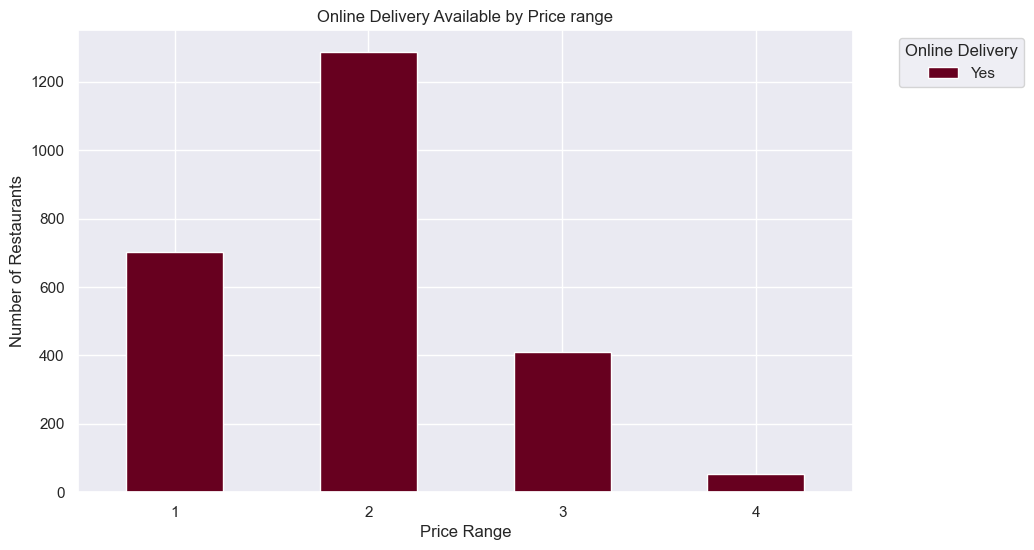

In [44]:
Online_Delivery_Yes = data[data['Has Online delivery'] == 'Yes']
Online_Delivery_counts = Online_Delivery_Yes.groupby(['Price range','Has Online delivery']).size().unstack()

Online_Delivery_counts.plot(kind='bar',stacked=True, colormap='RdBu', figsize=(10,6)) 
plt.title('Online Delivery Available by Price range')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation = 0)
plt.legend(title='Online Delivery', bbox_to_anchor = (1.05,1), loc='upper left')

plt.show()

# Level 2  

## Task 2 :- Price Range Analysis

◉ Determine the most common price range among all the restaurants.

◉ Calculate the average rating for each price range.

◉ Identify the color that represents the highest average rating among different price ranges.

#### Determine the most common price range among all the restaurants.

In [45]:
data['Price range'].value_counts()

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

In [46]:
most_common = data['Price range'].mode()[0]
print('\n Most Common Price range all the restaurant : ', most_common)


 Most Common Price range all the restaurant :  1


#### Calculate the average rating for each price range. & Identify the color that represents the highestaverage rating among different price ranges.

In [47]:
Average_Rating_by_price_range = data.groupby('Price range')['Aggregate rating'].mean().round(2)
print("Average Rating for each price range:-\n ")
print(Average_Rating_by_price_range)

Average Rating for each price range:-
 
Price range
1    2.00
2    2.94
3    3.68
4    3.82
Name: Aggregate rating, dtype: float64


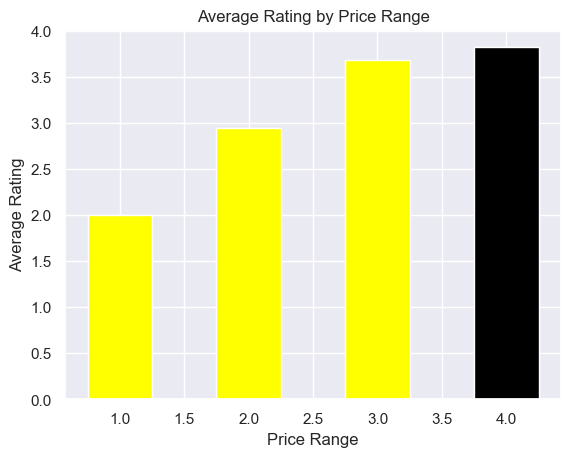

In [48]:
highest_avg_rating_color = Average_Rating_by_price_range.idxmax()
plt.bar(Average_Rating_by_price_range.index,Average_Rating_by_price_range,color='yellow',width=0.5)
plt.bar(highest_avg_rating_color,Average_Rating_by_price_range[highest_avg_rating_color],color='black',width=0.5)
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.title('Average Rating by Price Range')
plt.show()

######  > prince range 4 get the highest Average Rating, Which is 3.82 , followed by price range 3,2 and 1

# Level 2 

## Task 3 :- Feature Engineering

◉ Extract additional features from the existingcolumns, such as the length of the restaurantname or address.

◉ Create new features like "Has Table Booking"or "Has Online Delivery" by encodingcategorical variables.

##### Extract additional features from the existingcolumns, such as the length of the restaurantname or address.

In [49]:
data['Restaurant Name Length'] = data['Restaurant Name'].apply(lambda x: len(str(x)))
data['Address Length'] = data['Address'].apply(lambda x: len(str(x)))
data[['Restaurant Name','Restaurant Name Length','Address','Address Length']]

,Restaurant Name,Restaurant Name Length,Address,Address Length
0,Le Petit Souffle,16,"Third Floor, Century City Mall, Kalayaan Avenu...",71
1,Izakaya Kikufuji,16,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",67
2,Heat - Edsa Shangri-La,22,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",56
3,Ooma,4,"Third Floor, Mega Fashion Hall, SM Megamall, O...",70
4,Sambo Kojin,11,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",64
...,...,...,...,...
9546,Naml۱ Gurme,11,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",103
9547,Ceviz A��ac۱,12,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",77
9548,Huqqa,5,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",73
9549,A���k Kahve,11,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",75


##### Create new features like "Has Table Booking"or "Has Online Delivery" by encodingcategorical variables.

In [50]:
data['Has Table Booking'] = data['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0 )
data['Has Online Delivery'] = data['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0 )
data[['Has Table booking','Has Table Booking','Has Online delivery','Has Online Delivery']]

,Has Table booking,Has Table Booking,Has Online delivery,Has Online Delivery
0,Yes,1,No,0
1,Yes,1,No,0
2,Yes,1,No,0
3,No,0,No,0
4,Yes,1,No,0
...,...,...,...,...
9546,No,0,No,0
9547,No,0,No,0
9548,No,0,No,0
9549,No,0,No,0


##### > From the above 1st graph we can see that most of the restaurant do not have the online delivery services. In price range 1 less than 20 % are available, In price range 2 around 40 % are available, In price range 3 it look like 30 % are available and In price range 4 only 10 % are available.
##### > From the above 2nd graph, we can analyze, people used to buy from the Price range 2 and very less number of people buy food from Price range 4 may be because of its costliest in price compare to others.

# OBSERVATION:

###### ◉ Percentage of Restaurants offers table booking is 12.12 % & Percentage of Restaurants offers online delivery is 25.66 %.

###### ◉ Average Ratings With Table Booking is 3.44 & Without Table Booking is 2.56.

###### ◉ Most of the restaurant do not have the online delivery services. In price range 1 less than 20 % are available, In price range 2 around 40 % are available, In price range 3 it look like 30 % are available and In price range 4 only 10 % are available.

###### ◉ People mostly buy from the Price range 2 and very less number of people buy food from Price range 4 may be because of its costliest in price compare to others.

###### ◉ Most Common Price range among all the restaurant is 1.

###### ◉ Price range 4 get the highest average rating, which is 3.82, followed by price range 3, 2 and 1.

## ---------------------------  Thankyou  ------------------------------